In [96]:
import numpy as np
# import 모듈명 as 모듈명약자 : 모듈명을 불러오며, 모듈을 사용할 때 약자를 사용하는 방식
# 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리할 수 있게 해주는 파이썬 라이브러리
# 배열 연산, 다차원 데이터 저장

import pandas as pd
# 데이터 처리와 분석을 하기 위한 라이브러리

import matplotlib.pyplot as plt
# 데이터의 시각화를 위해 그림을 그려주는 라이브러리인 matplotlib 모듈을 불러옴.
# pyplot : 가장 기본적인 그래프를 그리는 명령어(2차원 그래프_좌표평면)

In [97]:
data_set = pd.read_csv("ex1data1.txt", sep = ",")
# csv파일형태의 ","로 분리되어 저장된 데이터를 pandas로 읽어와서 data_set에 저장
data_set.head()
# head()는 데이터들을 앞이 5개(0번째부터 4번째)만 보여준다.

,x(inputs),y(outputs)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [98]:
x = data_set.values[:,0]
# 배열에서 첫 번째 열을 꺼내서 변수 x에 저장

y = data_set.values[:,1]
# 배열에서 두 번째 열을 꺼내서 변수 y에 저장

Text(0.5, 1.0, 'Data Set in the Table')

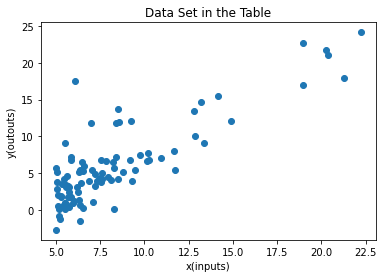

In [99]:
plt.scatter(x, y)
# x, y에 저장된 데이터들을 뿌린다

# 이때, 축들의 이름과 그래프의 이름을 지정해 주겠다.
plt.xlabel("x(inputs)")
# 가로축(x축)을 x(inputs)라고 써줌.
plt.ylabel("y(outouts)")
# 세로축(y축)을 y(outputs)라고 써줌.
plt.title("Data Set in the Table")

In [100]:
# 이제 본격적으로 위의 데이터들을 표현하는 함수를 선형으로 구현할 것이기 때문에
# 1차 함수(직선함수)로 만들어준다.

In [101]:
# 매개변수 theta_0와 theta_1을 아무 값이나 넣어서 초기화한다.
theta_0 = np.random.rand()
theta_1 = np.random.rand()

In [102]:
# 가설함수를 정의해줌.
def h(x):
    return theta_0 + theta_1*x

# 가상의 선형함수. theta_0 = y절편, theta_1 = 기울기(매개변수라 불러도 됨.)

In [103]:
# 손실함수를 정의해줌. (손실은 즉, 실제값과 예측값의 오차를 말한다.)
def J(x, y):
    return (1/2)*np.sum((y-h(x))**2)

# 실제 주어진 데이터의 결과값과 가설함수의 차이(오차)를 제곱한 것.
# 1/2 를 곱해준 것은 미분값을 예쁘게 만들어주기 위한 것.

In [104]:
# 학습률
learning_rate = 0.0001

In [105]:
# 변화률 -> 가설(선형)함수의 기울기
dev = 1
# 변화율을 처음엔 1로 넣어두고 점차 0에 근접하게 줄여나간다.
# -> 오차를 줄여나간다.

In [106]:
# 반복횟수(갱신 횟수)_손실횟수를 미분해서 theta_0과 theta_1의 갱신을 반복하는 횟수
count = 1

In [107]:
# 본격적으로 선형회귀를 추정한다.

error = J(x, y)                                            # 실제 값(data_set)을 넣어서 가설함수와 손실함수의 오차를 errord에 저장해준다.
                                                           # (처음 오차)
while dev > 0.01:                                          # 변화율이 0에 근접할 때까지 while문을 돌면서 반복한다.
    temp_0 = theta_0 - learning_rate*np.sum(h(x)-y)        # 손실함수를 theta_0에 대해 미분하고 실제값을 넣어 갱신한 값을 temp_0에 저장.
    temp_1 = theta_1 - learning_rate*np.sum((h(x)-y)*x)    # 손실함수를 theta_1에 대해 미분하고 실제값을 넣어 갱신한 값을 temp_1에 저장.
    theta_0 = temp_0                                       # 갱신되어 저장한 값을 다시 또 변화율을 0에 근접시키기 위해 theta_0에 저장.
    theta_1 = temp_1                                       # 갱신되어 저장한 값을 다시 또 변화율을 0에 근접시키기 위해 theta_1에 저장.
    error_next = J(x, y)                                   # 갱신되어 저장된 값으로 만들어진 오차(나중 오차).
    dev = error - error_next                               # 변화율 = 처음오차 - 나중 오차.
    error = error_next                                     # 갱신 반복을 위해 나중 오차를 처음 오차에 저장해준다.

In [108]:
print(theta_0, theta_1, dev, error)
# 가장 최적인 theta_0와 theta_1, dev, error를 출력해 본다.

-3.327991746700669 1.135993067213601 0.009981956093326971 437.1131440014737


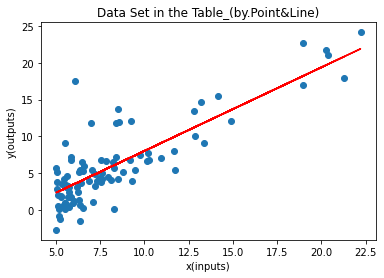

In [109]:
plt.scatter(x, y)
# x, y에 저장된 데이터들을 뿌린다.

# 이때 축들의 이름과 그래프의 이름을 지정해 주겠다.

plt.xlabel("x(inputs)")
# 가로측(x축)을 x(inputs)라고 써줌.
plt.ylabel("y(outputs)")
# 세로측(y축)을 y(outputs)라고 써줌.
plt.title("Data Set in the Table_(by.Point&Line)")
# 데이터들을 가장 잘 표현해 줄 선형 회귀선도 그려준다.
plt.plot(x, h(x), color='red')